In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_csv("HousePricePrediction.csv")
 
print(dataset.head(5))

dataset.shape

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


(2919, 13)

In [3]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


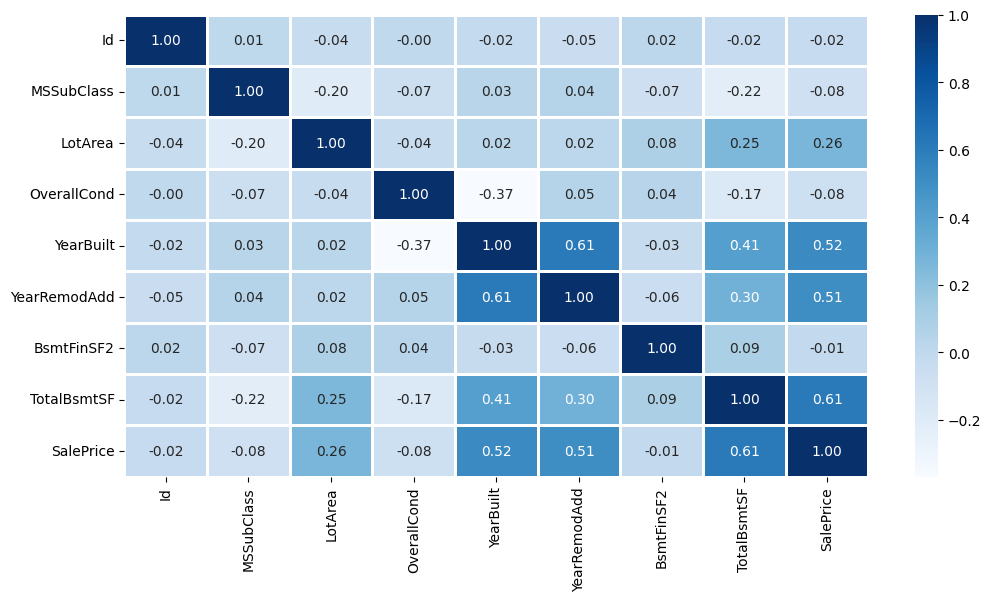

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_data = dataset.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix,
            cmap='Blues',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()


In [5]:
numeric_data = dataset.select_dtypes(include=[np.number])


In [6]:
correlation_matrix = numeric_data.corr()


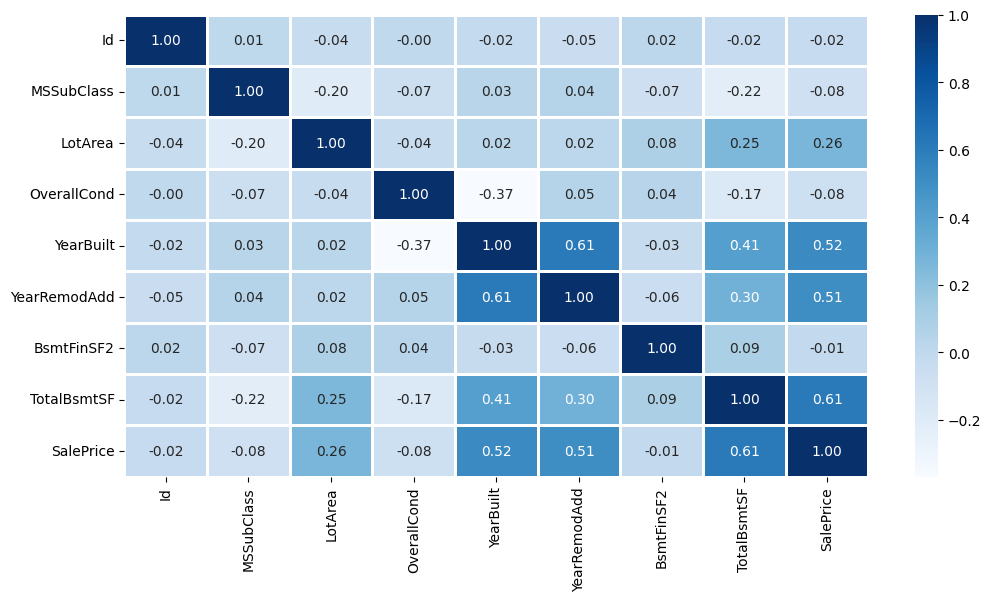

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='Blues', fmt='.2f', linewidths=2, annot=True)
plt.show()


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

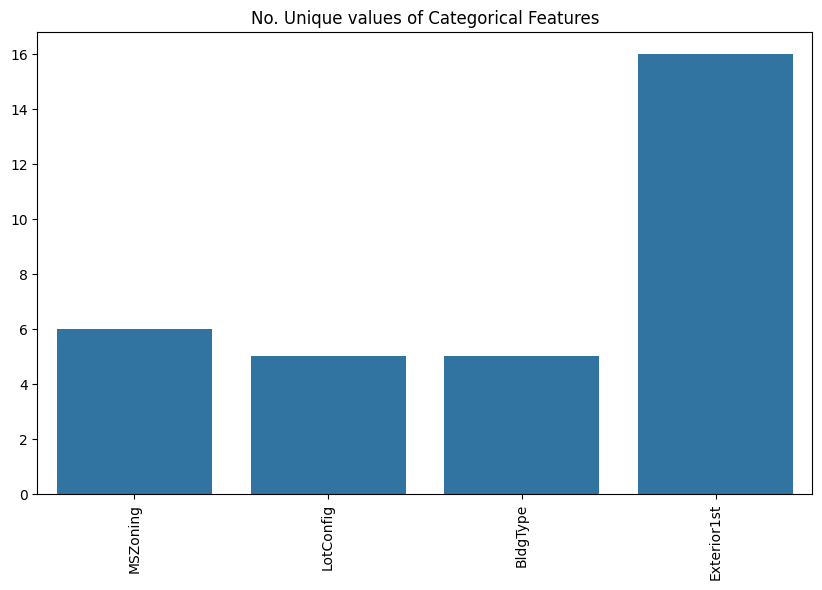

In [8]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

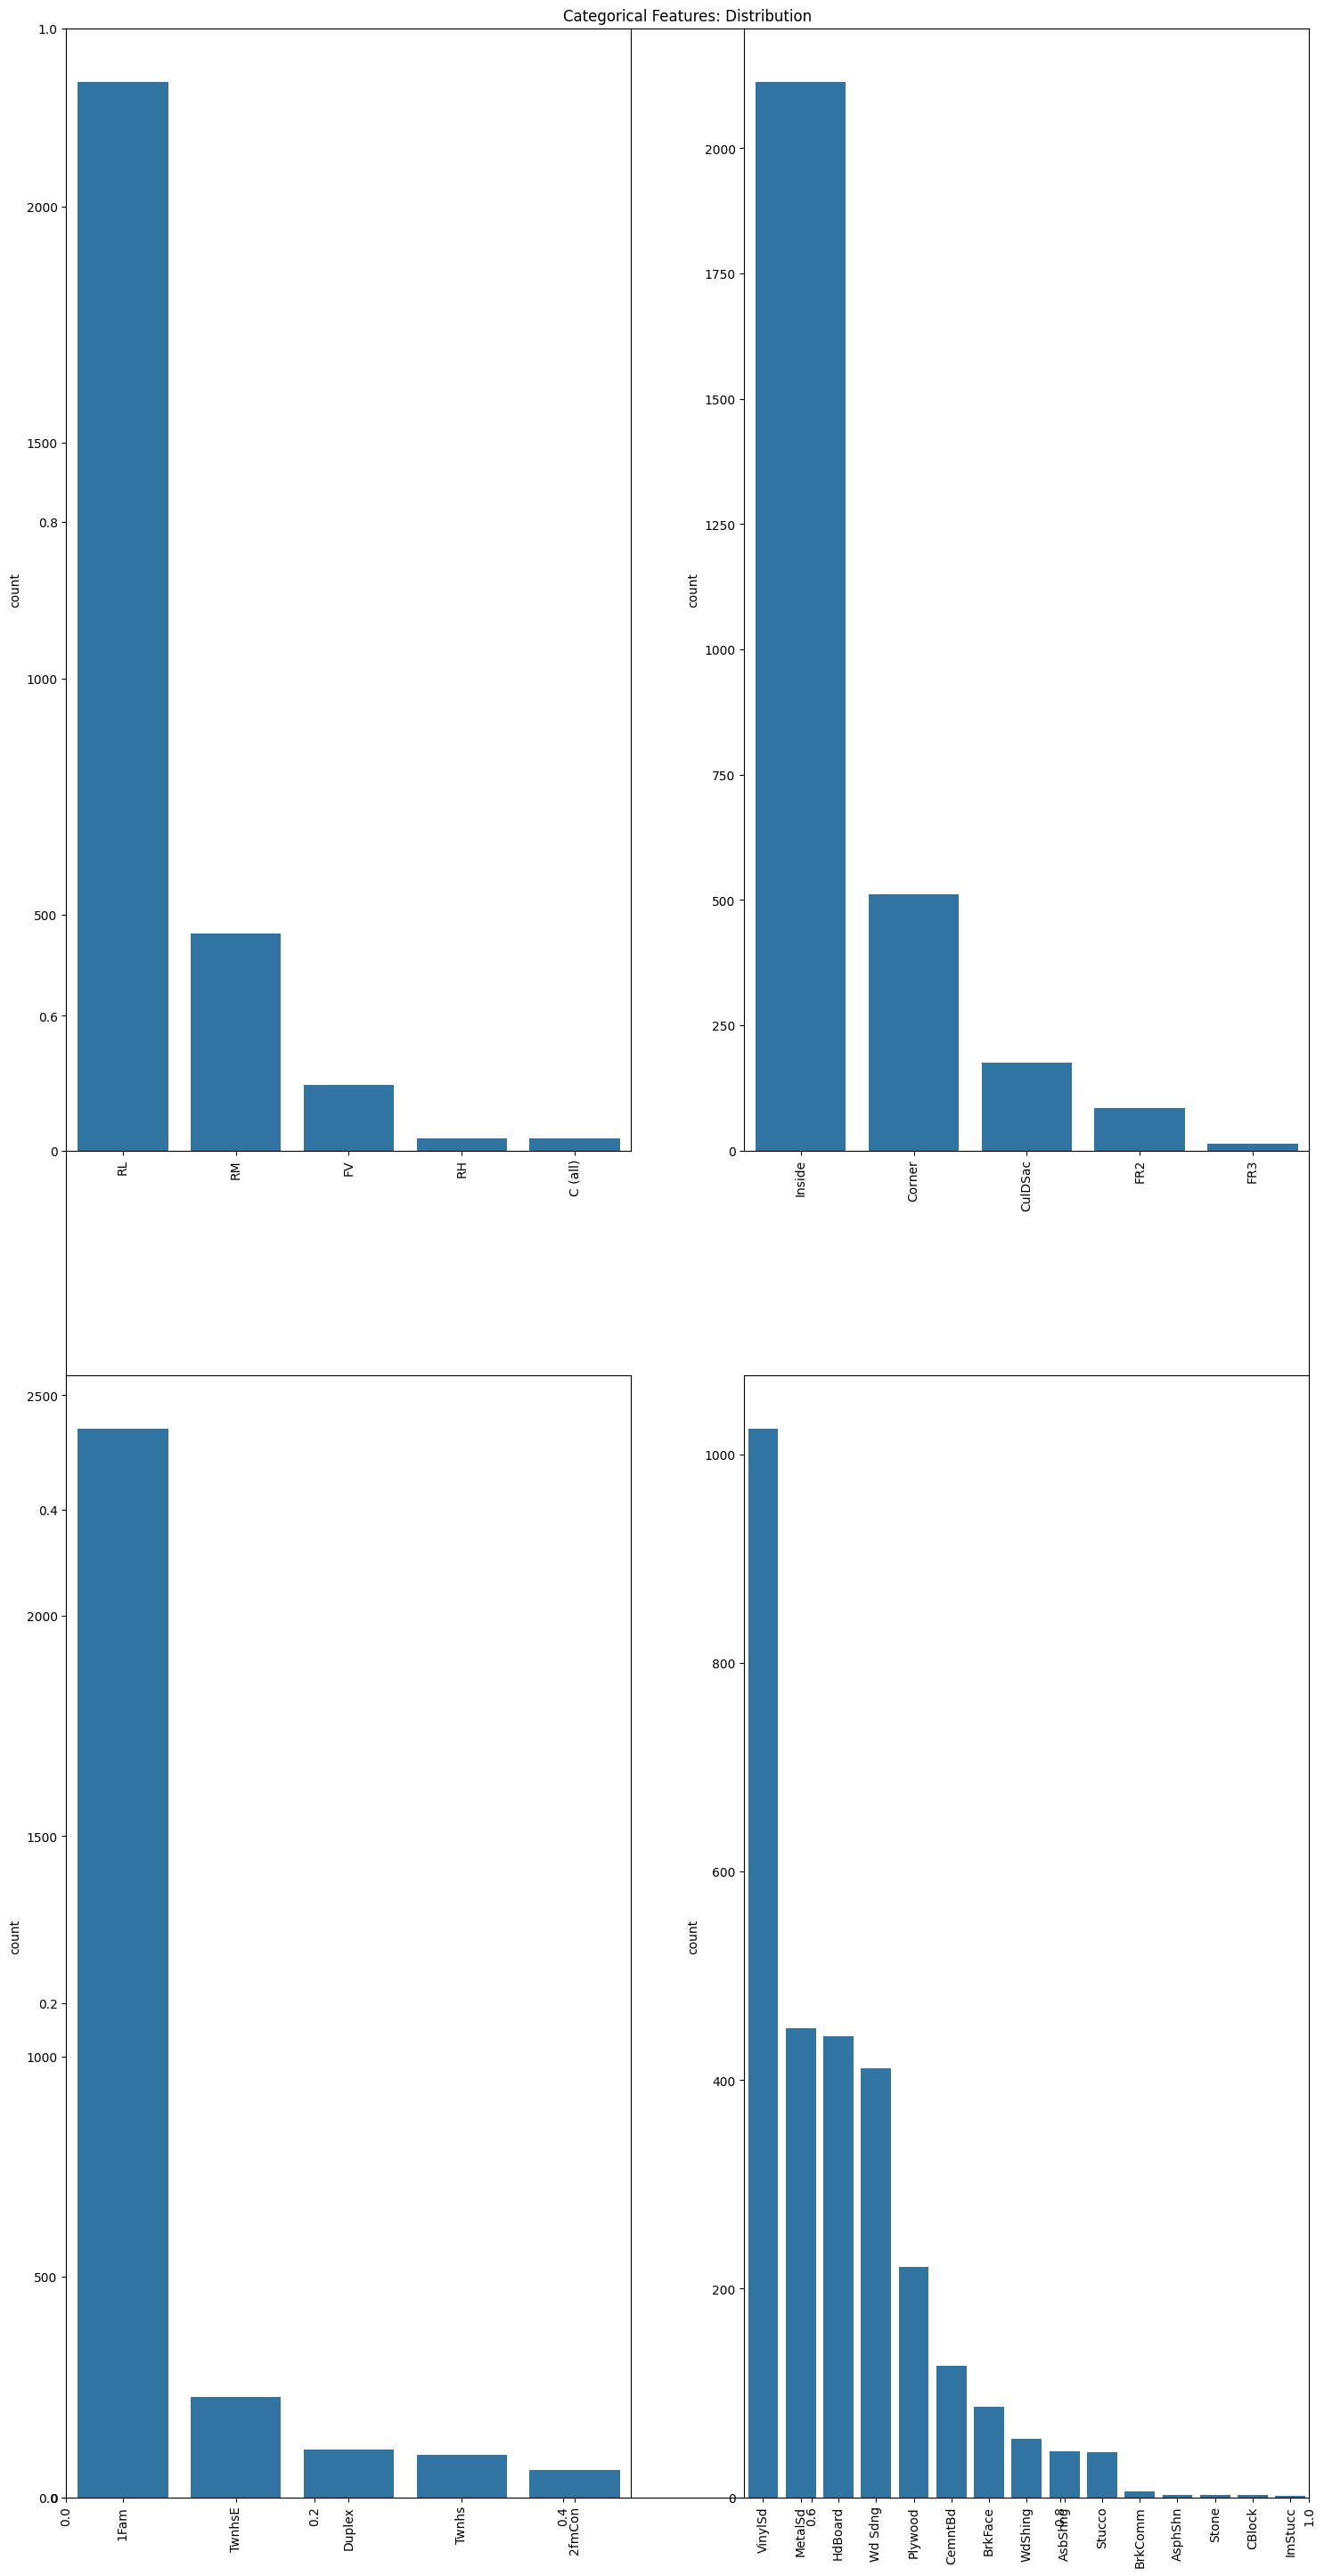

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(2, 2, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [10]:
if 'Id' in dataset.columns:
    dataset.drop(['Id'], axis=1, inplace=True)

if 'SalePrice' in dataset.columns:
    dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

new_dataset = dataset.dropna()

print(new_dataset.isnull().sum())


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


In [11]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [12]:
from sklearn.preprocessing import OneHotEncoder

object_cols = new_dataset.select_dtypes(include=['object']).columns
OH_encoder = OneHotEncoder(sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

OH_cols.index = new_dataset.index

num_dataset = new_dataset.drop(object_cols, axis=1)

final_dataset = pd.concat([num_dataset, OH_cols], axis=1)

print(final_dataset.head())
df_final = final_dataset

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice    0    1  ...   20   21   22   23   24   25   26  \
0        856.0   208500.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       1262.0   181500.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2        920.0   223500.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        756.0   140000.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       1145.0   250000.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    27   28   29  
0  1.0  0.0  0.0  
1  0.0  0.0  0.0  
2  1.0  0.0

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [14]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error


X_train.columns = X_train.columns.astype(str)
X_valid.columns = X_valid.columns.astype(str)


model_SVR = svm.SVR()


model_SVR.fit(X_train, Y_train)


Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [15]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19143678176326231

In [16]:

from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


In [19]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 
 
cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 4.14ms	remaining: 4.14s
1:	learn: 55780.1567575	total: 9.91ms	remaining: 4.95s
2:	learn: 55060.9599505	total: 14.9ms	remaining: 4.95s
3:	learn: 54456.1126921	total: 19.9ms	remaining: 4.95s
4:	learn: 53901.1464265	total: 25.6ms	remaining: 5.09s
5:	learn: 53334.6062357	total: 32ms	remaining: 5.31s
6:	learn: 52824.4943646	total: 36.8ms	remaining: 5.22s
7:	learn: 52381.4267520	total: 41.4ms	remaining: 5.13s
8:	learn: 51841.0364316	total: 46.5ms	remaining: 5.12s
9:	learn: 51281.5852560	total: 51.1ms	remaining: 5.06s
10:	learn: 50825.3817438	total: 56.2ms	remaining: 5.06s
11:	learn: 50477.2609796	total: 61.2ms	remaining: 5.04s
12:	learn: 50081.4097641	total: 66.5ms	remaining: 5.05s
13:	learn: 49663.6380360	total: 72.2ms	remaining: 5.08s
14:	learn: 49334.5782662	total: 78ms	remaining: 5.12s
15:	learn: 48967.5221026	total: 83.3ms	remaining: 5.12s
16:	learn: 48676.4063222	total: 87.5ms	remaining: 5.06s
17:	learn: 48359.1169955	total: 

0.38351169878113034